## Uninteresting Example
Running the particle filter on real flu data. 

However, we don't have anything to compare it to, as the Trend Forecasting is not in place yet.

In [1]:
from src import run_particle_filter

run_particle_filter.main(location_code='04', 
                         target_date='2023-10-28', 
                         num_particles=100)

Running Particle Filter: 100%|██████████| 126/126 [01:29<00:00,  1.41it/s]


In [31]:
"""Plotting"""
import seaborn as sns
import pandas as pd

df = pd.read_csv("../output/pf_avg_betas/04/2023-10-28_avg_betas.csv", header=None)
df.rename(columns={0: "pf_avg_beta"}, inplace=True)
list(df.columns)

['pf_avg_beta']

<Axes: >

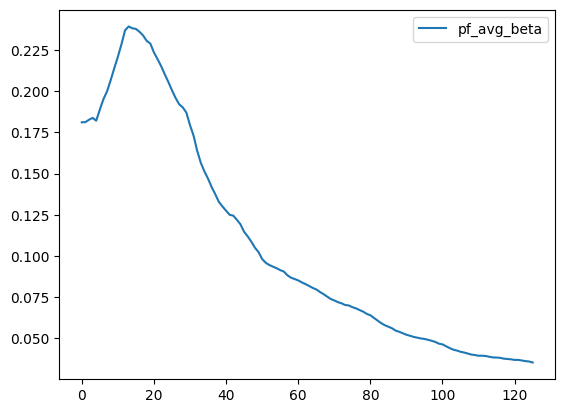

In [33]:
sns.lineplot(data=df)

## Integrating the PF with SPHERE

I installed SPHERE as a package using PIP. 
I hard-coded beta as a constant 0.2. Not seen below. 

In [7]:
from sphere.model.model_factory import ModelFactory
from sphere.parameters.parameters import SIRHParameters
from sphere.solvers.implementations import EulerSolver

params = SIRHParameters()
sirh = ModelFactory.create_model(model_type="SIRH",
                                 params=params,
                                 solver_cls=EulerSolver)
az_population = 7151502
sirh.run(x0=[az_population * 0.98, az_population * 0.02, 0, 0, 0],
         t0=0,
         t_final=364,
         dt=1.0)

Running Model: 100%|██████████| 364/364 [00:01<00:00, 349.25it/s]

Model.run() was successful. Data is accessible at Model.output.states. Plot the output with Model.output.plot_states().


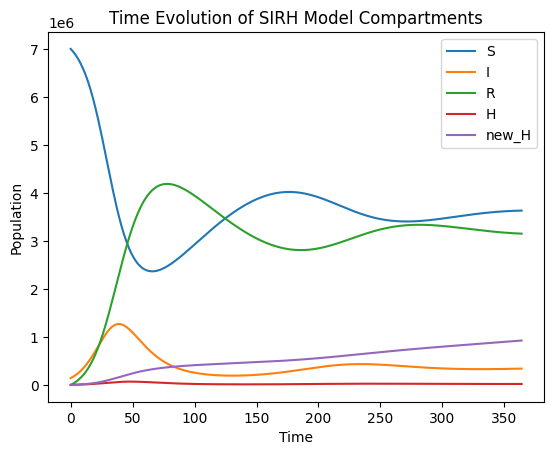

In [8]:
sirh.output.plot_states()

In [9]:
sirh.output.observations.shape

(365,)

In [17]:
from src.particle_filter.initialize import initialize_particle_filter

pf_algo = initialize_particle_filter(state_population=az_population,
                                     location_code='04',
                                     target_date='2047-10-28',
                                     num_particles=10,
                                     runtime=365)

In [24]:
observations = sirh.output.observations.tolist()
observations = [round(obs) for obs in observations]

In [23]:
pf_algo.run(observation_data=observations)

Running Particle Filter:  35%|███▌      | 128/365 [00:21<00:39,  6.02it/s]


KeyboardInterrupt: 

Looks like an error in the resampling step. Stuck in an infinite `while` loop.